# Explaiation for caliberation
### There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions cv2.calibrateCamera() and cv2.undistort() to compute the calibration and undistortion.
1. corners were found using code from the quiz https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/bf149677-e05e-4813-a6ea-5fe76021516a. the only difference is in project we are doing it on (9,6)

2.Camera is caliberated using this code from the udacity 
https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5415176a-d615-49af-8535-53a385768a23

3.https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

### Note: If further explaination is neceassry please let me know. The code of this section is totally from udacity


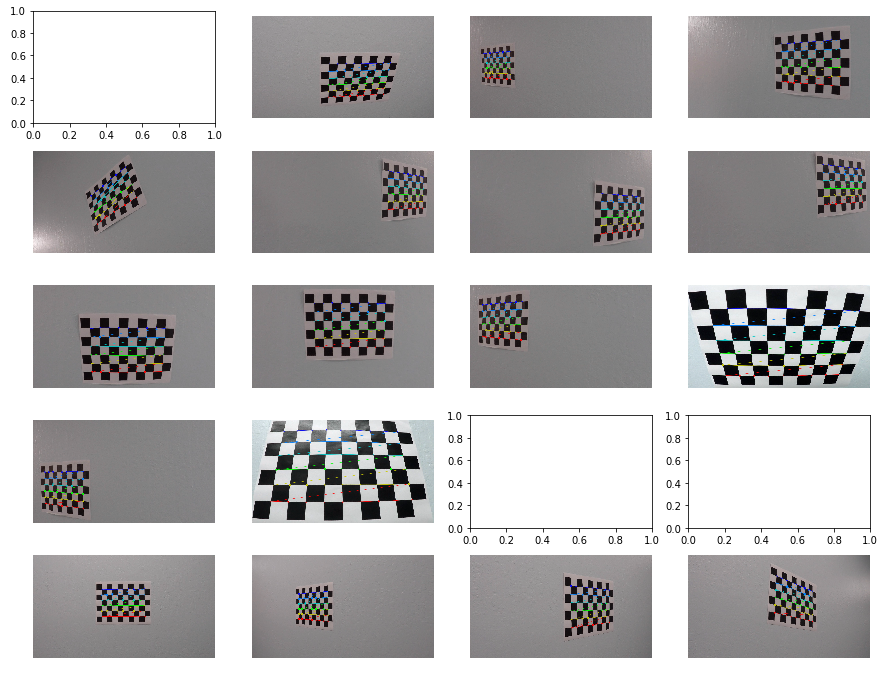

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import glob
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# This code is helpful i showing images
fig, axs = plt.subplots(5,4, figsize=(15, 12))
axs = axs.ravel()
# Make a list of calibration images
images = glob.glob('camera_cal/ca*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[idx].axis('off')
        axs[idx].imshow(img)
        

img = cv2.imread('camera_cal/calibration1.jpg')
img_size = img.shape[1],img.shape[0]

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)


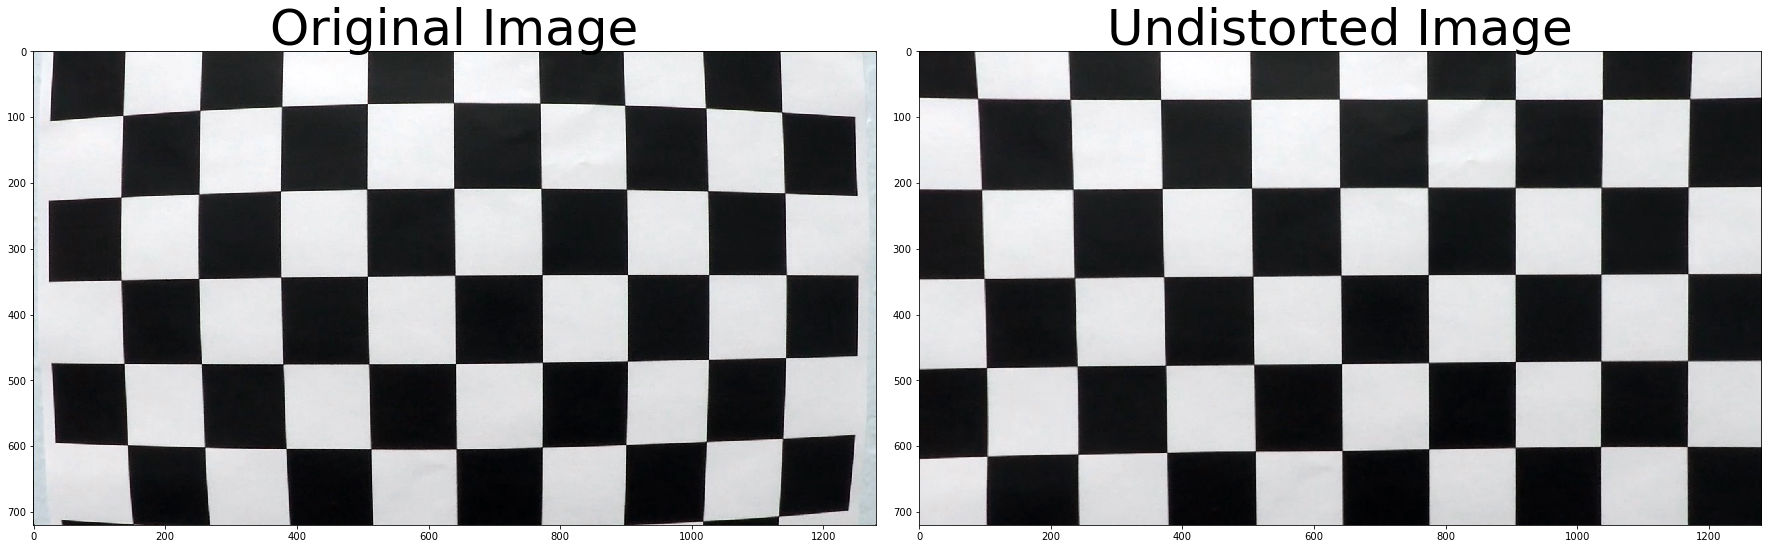

In [2]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

# undistort function Explaination
This function uses mtx,dist calculated from the above function to undistort an image.


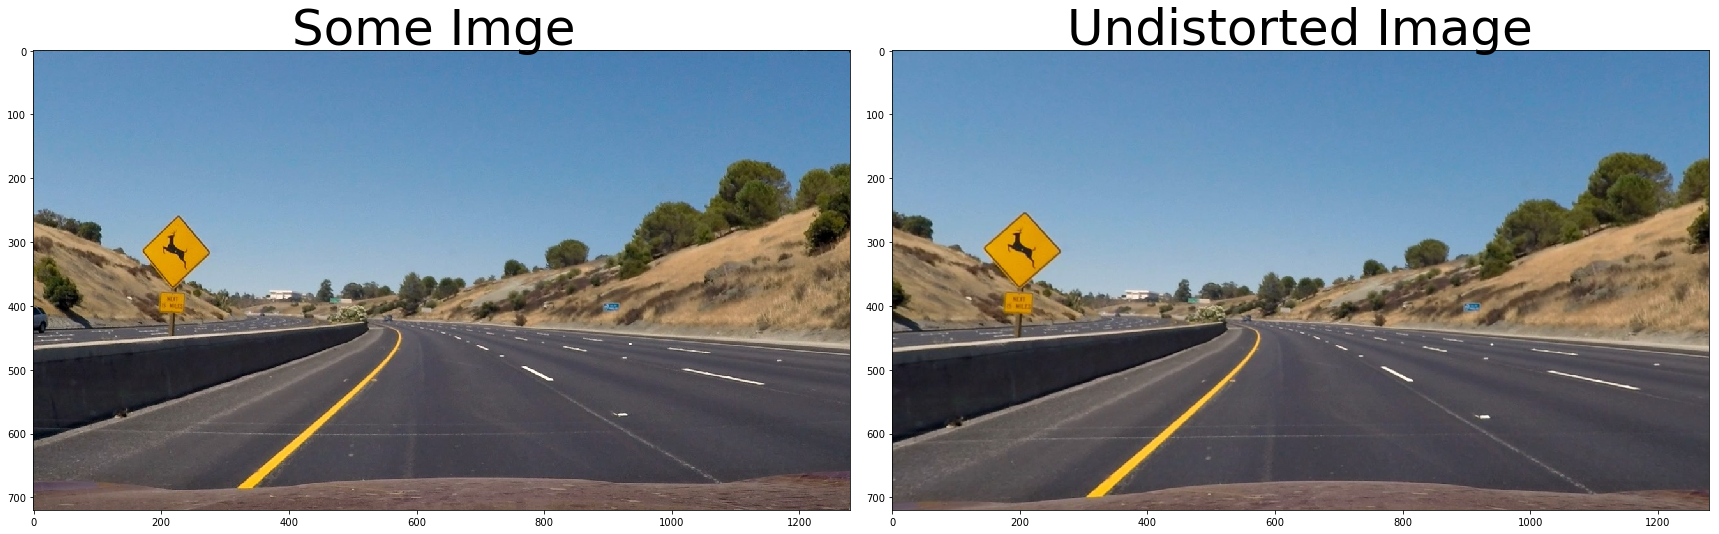

In [3]:
# function for undistoting image
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

# Choose an image from which to build and demonstrate each step of the pipeline
Img = cv2.imread('test_images/test2.jpg')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
Img_undistorted = undistort(Img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(Img)
ax1.set_title('Some Imge ', fontsize=50)
ax2.imshow(Img_undistorted, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.show()

# Explaination for Perspective transform
A perspective transform maps the points in a given image to different, desired, image points with a new perspective.

The Exact code from https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/d33ae3ea-01aa-414e-ad20-208dc161793d <br>
Compute the perspective transform, M, given source and destination points:<br>
`M = cv2.getPerspectiveTransform(src, dst)` <br>
Compute the inverse perspective transform:<br>
`Minv = cv2.getPerspectiveTransform(dst, src)`<br>
Warp an image using the perspective transform, M:<br>
`warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)`<br>

### Note:The code is same as in the udacity page

In [4]:
def warper(img, src, dst):
    h,w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

# Explaination for src and dst
The points for the source and destinations were selected manually based on experiment with all the test images. 

` manually images were analyzed and lines were drawn on it to find the trapezoid suited for the source points `

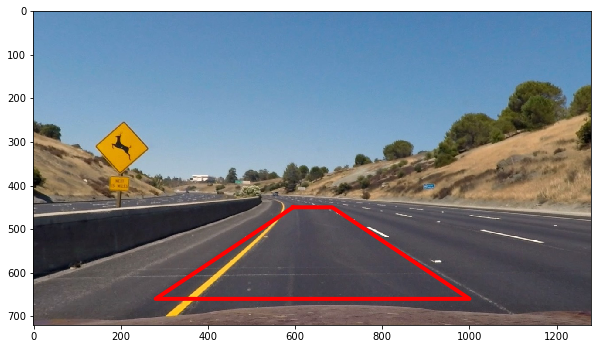

In [5]:
h,w = Img_undistorted.shape[:2]
plt.figure(figsize=(10,10))
plt.imshow(Img_undistorted)
plt.plot([595,685,1000,280,595],[450,450,660,660,450],color='RED', linewidth=4) 

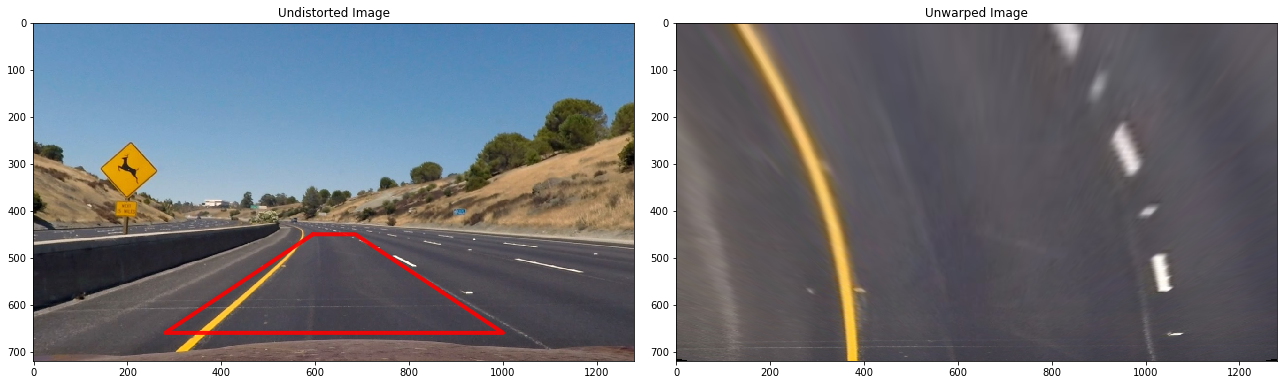

In [6]:
h,w = Img_undistorted.shape[:2]

# define source and destination points for transform
src = np.float32([[  595,  450 ],
       [  685,  450 ],
       [ 1000,  660 ],
       [  280,  660 ]])
dst = np.float32([[  300,  0 ],
       [  980,  0 ],
       [ 980,  720 ],
       [  300,  720 ]])

Unwrapped_Img, M, Minv = warper(Img_undistorted, src, dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12))
f.tight_layout()
ax1.imshow(Img_undistorted)
ax1.plot([595,685,1000,280,595],[450,450,660,660,450], color='Red', alpha=0.9, linewidth=4)
ax1.set_title('Undistorted Image')
ax2.imshow(Unwrapped_Img)
ax2.set_title('Unwarped Image')

# Explaination of the HSL, RGB color space
https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/d7542ed8-36ce-4407-bd0a-4a38d17d2325
A code of displaying images with different chanels of different colorspaces are given in the udacity course page. 



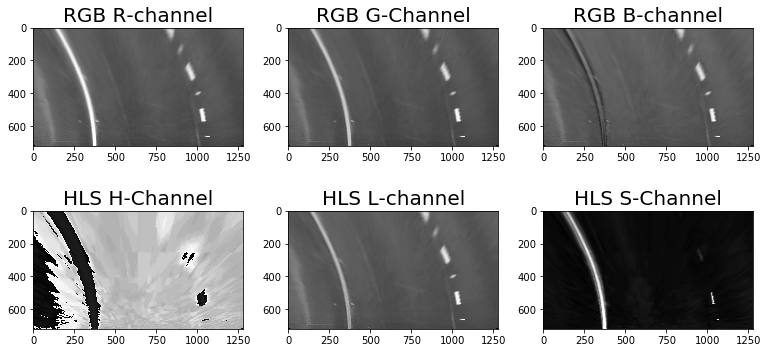

In [7]:
# Visualize multiple color space channels
R_Channel = Unwrapped_Img[:,:,0]
G_Channel = Unwrapped_Img[:,:,1]
B_Channel = Unwrapped_Img[:,:,2]
HLS = cv2.cvtColor(Unwrapped_Img, cv2.COLOR_RGB2HLS)
H_Channel = HLS[:,:,0]
L_Channel = HLS[:,:,1]
S_Channel = HLS[:,:,2]
fig, axs = plt.subplots(2,3, figsize=(10, 8))
axs = axs.ravel()
fig.tight_layout()
axs[0].imshow(R_Channel, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=20)
axs[1].imshow(G_Channel, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=20)
axs[2].imshow(B_Channel, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=20)
axs[3].imshow(H_Channel, cmap='gray')
axs[3].set_title('HLS H-Channel', fontsize=20)
axs[4].imshow(L_Channel, cmap='gray')
axs[4].set_title('HLS L-channel', fontsize=20)
axs[5].imshow(S_Channel, cmap='gray')
axs[5].set_title('HLS S-Channel', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.6, bottom=0.)

# Explaination of L channel binary image
The code from creating a binary to display from the unwrapped image is available on udacity <br>
https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a1b70df9-638b-46bb-8af0-12c43dcfd0b4

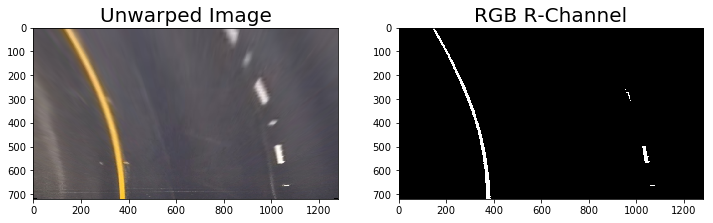

In [8]:
# Define a function that thresholds the R-channel of RGB
# Use exclusive lower bound (>) and inclusive upper (<=)
def RGB_Rthresh(img, thresh=(20, 255)):    
    RGB_R = img[:,:,0]
    RGB_R = RGB_R*(255/np.max(RGB_R))
    # 2) Apply a threshold to the R channel
    binary_output = np.zeros_like(RGB_R)
    binary_output[(RGB_R > thresh[0]) & (RGB_R <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output


Img_R = RGB_Rthresh(Unwrapped_Img, (230, 255))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
ax1.imshow(Unwrapped_Img)
ax1.set_title('Unwarped Image', fontsize=20)
ax2.imshow(Img_R, cmap='gray')
ax2.set_title('RGB R-Channel', fontsize=20)

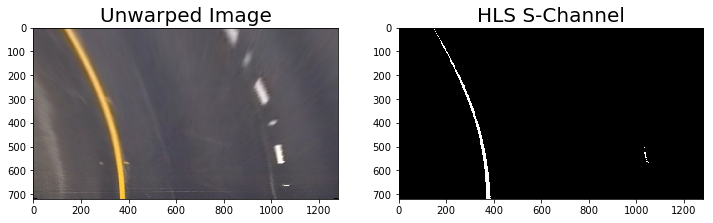

In [9]:
def s_lthresh(img, thresh=(200, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_channel = s_channel*(255/np.max(s_channel))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel<= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output


Img_S = s_lthresh(Unwrapped_Img, (200, 255))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
ax1.imshow(Unwrapped_Img)
ax1.set_title('Unwarped Image', fontsize=20)
ax2.imshow(Img_S, cmap='gray')
ax2.set_title('HLS S-Channel', fontsize=20)

https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a1b70df9-638b-46bb-8af0-12c43dcfd0b4

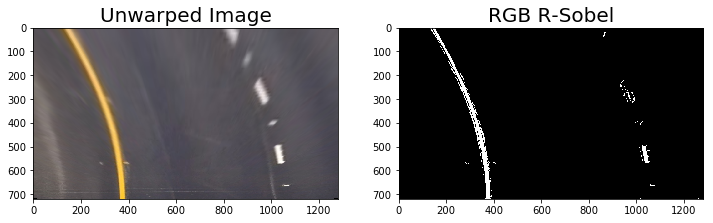

In [10]:
#binary thresholding the R channel (RGB) and binary thresholding the result of applying the
#Sobel operator in the x direction on the original image.
# Use exclusive lower bound (>) and inclusive upper (<=)
def RGB_Rcombine(img, thresh=(220, 255)):
    # Note: img is the undistorted image
    r_channel = img[:,:,0]

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold x gradient
    thresh_min = 50
    thresh_max = 70
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    r_thresh_min = 230
    r_thresh_max = 255
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh_min) & (r_channel <= r_thresh_max)] = 1

    # Stack each channel to view their individual contributions in red and sobel_x respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, r_binary)) * 255
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(r_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary


Img_R_sobel = RGB_Rcombine(Unwrapped_Img, (200, 255))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
ax1.imshow(Unwrapped_Img)
ax1.set_title('Unwarped Image', fontsize=20)
ax2.imshow(Img_R_sobel, cmap='gray')
ax2.set_title('RGB R-Sobel', fontsize=20)


https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a1b70df9-638b-46bb-8af0-12c43dcfd0b4

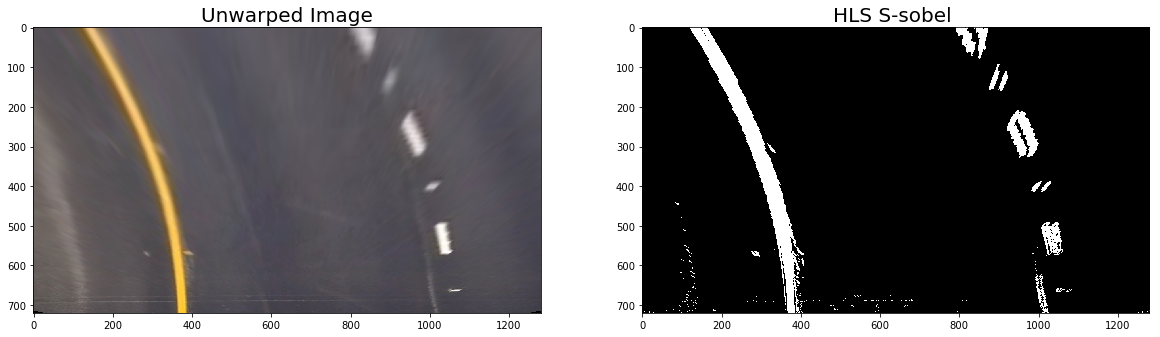

In [11]:
#binary thresholding the R channel (RGB) and binary thresholding the result of applying the
#Sobel operator in the x direction on the original image.
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_SCombine(img, thresh=(90, 255)):
    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 15
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary

Img_S_Sobel = hls_SCombine(Unwrapped_Img, (90, 255))
# Visualize hls s-channel threshold
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(Unwrapped_Img)
ax1.set_title('Unwarped Image', fontsize=20)
ax2.imshow(Img_S_Sobel, cmap='gray')
ax2.set_title('HLS S-sobel ', fontsize=20)

# Explaination of the pipeline 
Given an image this pipeline will
1. Input image will be undistorted using the prameters calcuated from calibration
2. Perspective transformed applied to the undistorted image
3. R channel binary image calculated from transformed image
4. S channel binary image calculated from transformed image
5. Both binary images are combined to create a combined image 



In [12]:

def pipeline(img):
    # Undistort
    Img_undistorted= undistort(img)
    
    # Perspective Transform
    Unwrapped_Img, M, Minv = warper(Img_undistorted, src, dst)

    # combination of S channel of HSL with sobel_x
    Img_S_Sobel = hls_SCombine(Unwrapped_Img)

    # combination of R channel of RGB with sobel_x
    Img_R_sobel = RGB_Rcombine(Unwrapped_Img)
    
    # Combine R_sobel and S_sobel
    combined = np.zeros_like(Img_R_sobel)
    combined[(Img_S_Sobel == 1) | (Img_R_sobel == 1)] = 1
    #return combined, Minv
    return combined, Minv

# run  pipeline on all the images

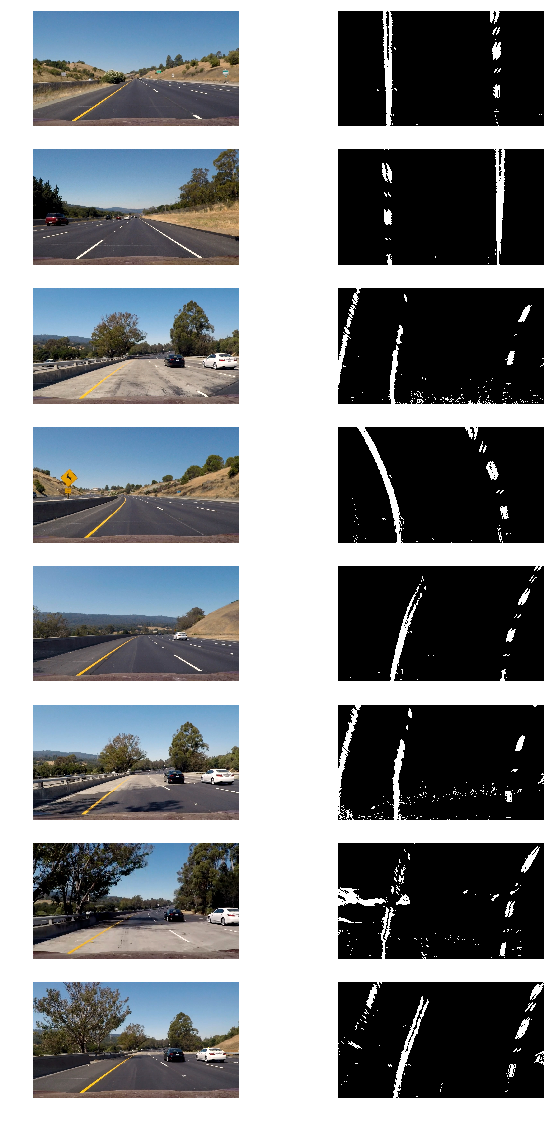

In [13]:
# Make a list of example images
images = glob.glob('./test_images/*.jpg')                                          
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
axs = axs.ravel()                  
i = 0
for img in images:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    binary_image, Minv = pipeline(image)
    axs[i].imshow(image)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(binary_image, cmap='gray')
    axs[i].axis('off')
    i += 1

# checking the histogram for test image  

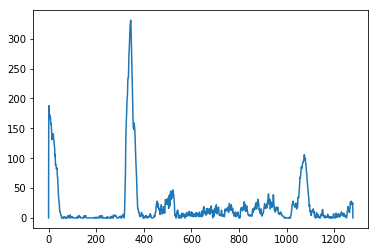

In [14]:
Img = cv2.imread('./test_images/test1.jpg')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
binary_wraped, Minv = pipeline(Img)
histogram = np.sum(binary_wraped[binary_wraped.shape[0]/2:,:], axis=0)
plt.plot(histogram)
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Explaination of sliding_window_polyfit
All the code is from this link of udacity which is explained in very much detail <br>
https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/c41a4b6b-9e57-44e6-9df9-7e4e74a1a49a <br>

In [15]:
def polyfit(binary_wraped):
    # Assuming you have created a warped binary image called "binary_wraped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_wraped[binary_wraped.shape[0]/2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_wraped, binary_wraped, binary_wraped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_wraped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_wraped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_wraped.shape[0] - (window+1)*window_height
        win_y_high = binary_wraped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 4) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 4) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    
    
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, out_img, histogram, nonzeroy, nonzerox

(720, 0)

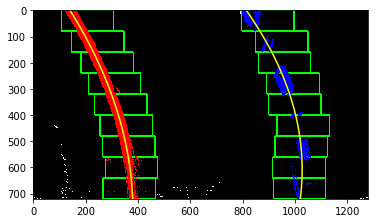

In [16]:
# visualize the result on example image
Img = cv2.imread('test_images/test2.jpg')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
binary_wraped, Minv = pipeline(Img)
    
left_fit, right_fit, left_lane_inds, right_lane_inds, out_img, histogram, nonzeroy, nonzerox = polyfit(binary_wraped)


# Generate x and y values for plottingw
ploty = np.linspace(0, binary_wraped.shape[0]-1, binary_wraped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

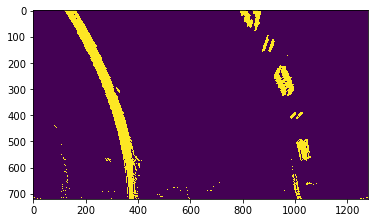

In [17]:
plt.imshow(binary_wraped)

(0, 1280)

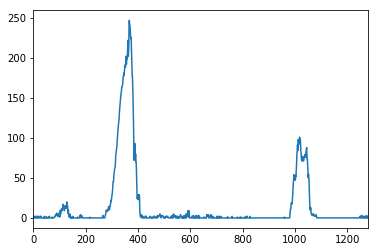

In [18]:
# Print histogram from sliding window polyfit for example image
plt.plot(histogram)
plt.xlim(0, 1280)

In [19]:
# Define method to fit polynomial to binary image based upon a previous fit 
def previous_fit(binary_warped, left_fit_prev, right_fit_prev):
    #Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + 
    left_fit_prev[2] - margin)) & (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + 
    left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + 
    right_fit_prev[2] - margin)) & (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + 
    right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return left_fit, right_fit, left_lane_inds, right_lane_inds, ploty, left_fitx,right_fitx, nonzerox,nonzeroy

(720, 0)

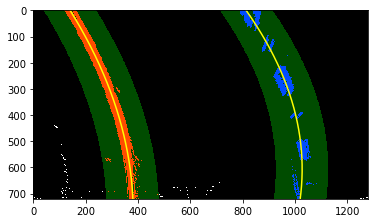

In [20]:
Img = cv2.imread('test_images/test2.jpg')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
binary_warped, Minv = pipeline(Img)  
margin = 100
left_fit_prev = left_fit
right_fit_prev = right_fit

left_fit, right_fit, left_lane_inds, right_lane_inds, ploty, left_fitx, right_fitx, nonzerox, nonzeroy = previous_fit(binary_warped, left_fit_prev, right_fit_prev)

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

# Raduis curvature

In [21]:
def calc_curv_rad_and_center_dist(binary_warped, l_fit, r_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    #height of the image
    h = binary_warped.shape[0]
    #generate data to represet lae-line pixels
    ploty = np.linspace(0, h-1, h)
    # Identify the x and y positions of all nonzero pixels in the image
    #nonzero = binary_warped.nonzero()
    #nonzeroy = np.array(nonzero[0])
    #nonzerox = np.array(nonzero[1])
    
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]    
    
     # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    
    
     # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car = binary_warped.shape[1]/2
        left_fit_line = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        right_fit_line = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        center_lane = (left_fit_line + right_fit_line) /2
        center = (car - center_lane) * xm_per_pix
    
    return left_curverad, right_curverad, center

left_raduis_curv, right_raduis_curv, center= calc_curv_rad_and_center_dist(binary_warped, left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox,nonzeroy)

print('Radius of curvature for example:', left_raduis_curv, 'm,', right_raduis_curv, 'm')
print('Distance from lane center for example:', center, 'm')

Radius of curvature for example: 118.623434586 m, 81.7552778345 m
Distance from lane center for example: -0.591150936155 m


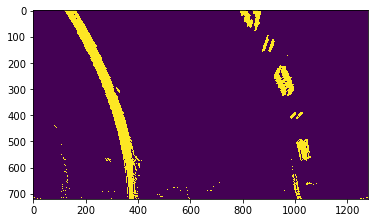

In [22]:
plt.imshow(binary_warped)

# Drawing
https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/7ee45090-7366-424b-885b-e5d38210958f
Once you have a good measurement of the line positions in warped space, it's time to project your measurement back down onto the road! Let's suppose, we have an image,  have a warped binary image called warped, and you have fit the lines with a polynomial l_fit, r_fit. with l_fit ad r_fit we compute arrays called left_fitx and right_fitx and from the image we calculate ploty, which represent the x and y pixel values of the lines. You can then project those lines onto the original image in the following code.

In [23]:
def draw(image, warped, l_fit, r_fit, Minv):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    #from l_fit calcualte array left_fitx
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    #from r_fit calcualte right_fitx
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return result

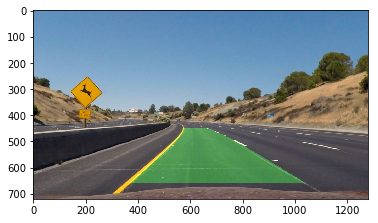

In [24]:

result = draw(Img_undistorted, binary_warped, left_fit, right_fit, Minv)
plt.imshow(result)

In [25]:
def draw_data(IMG, curv, center):
    new_IMG = np.copy(IMG)
    h = new_IMG.shape[0]
    text = str(curv) + 'm'
    cv2.putText(new_IMG, text, (40,70), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center > 0:
        direction = 'right'
    elif center < 0:
        direction = 'left'
    center = abs(center)
    text = str(center) + 'm ' + str(direction) + ' of center'
    cv2.putText(new_IMG, text, (40,120),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_IMG

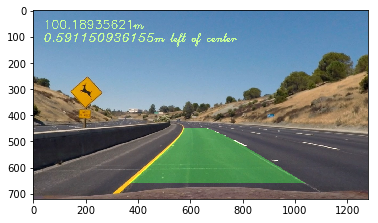

In [26]:
exampleImg_out2 = draw_data(result, (left_raduis_curv+right_raduis_curv)/2, center)
plt.imshow(exampleImg_out2)

In [27]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False       
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            self.detected = True
            self.px_count = np.count_nonzero(inds)
            self.current_fit.append(fit)
            if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                self.current_fit = self.current_fit[len(self.current_fit)-5:]
            self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)

In [28]:
def process_image(Image):
    new_Image = np.copy(Image)
    binary_warped, Minv = pipeline(new_Image)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, out_img, histogram, nonzeroy, nonzerox = polyfit(binary_warped)        
    else:  
        l_fit, r_fit, l_lane_inds, r_lane_inds, ploty, left_fitx, right_fitx, nonzerox, nonzeroy = previous_fit(binary_warped, l_line.best_fit, r_line.best_fit)
        
    if l_fit is not None and r_fit is not None:        
        h = Image.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        #if there is difference of greater than 100 calculate the polyfit again
        if abs(650 - x_int_diff) > 100:          
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        output_image_1 = draw(new_Image, binary_warped, l_line.best_fit, r_line.best_fit, Minv)
        left_raduis_curv, right_raduis_curv, center = calc_curv_rad_and_center_dist(binary_warped, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds, nonzerox,nonzeroy)
        output_image = draw_data(output_image_1, (left_raduis_curv+right_raduis_curv)/2, center)
        
    else:
        output_image = new_Image
    return output_image

In [29]:
l_line = Line()
r_line = Line()
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [06:11<00:00,  2.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 6min 15s
